# 中国上市公司数量年度统计分析

本项目对中国股票市场进行全面的统计分析，包括：
- 各年度上市公司总数变化
- 各交易所上市公司分布
- 板块分布统计
- 行业分布分析
- 数据可视化展示

**数据来源：使用akshare库获取的真实股票市场数据（东方财富网等权威金融数据源）**

In [9]:
# 设置matplotlib内联显示
%matplotlib inline

# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import sys
import os

# 忽略警告
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"Python版本: {sys.version}")
print(f"分析开始时间: {datetime.now()}")
print("="*60)
print("📈 使用真实数据分析模式")

Python版本: 3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]
分析开始时间: 2025-05-29 23:37:41.917653
📈 使用真实数据分析模式


In [10]:
# 导入自定义模块
try:
    from src.data_collector_real import RealStockDataCollector
    from src.data_processor import StockDataProcessor
    from src.visualizer import StockDataVisualizer
    print("✅ 所有模块导入成功")
    print("📈 使用真实数据收集器（akshare）")
except ImportError as e:
    print(f"❌ 模块导入失败: {e}")
    print("请确保已安装akshare库：pip install akshare")
    print("请确保Python版本为3.8+")

✅ 所有模块导入成功
📈 使用真实数据收集器（akshare）


## 2. 数据收集与加载（真实数据）

In [11]:
# 初始化真实数据收集器
collector = RealStockDataCollector(data_dir='./data/raw')

print("🚀 开始收集中国股票市场真实数据...")
print("="*50)
print("📈 使用akshare获取最新真实市场数据")
print("="*50)

# 收集所有股票数据
all_stocks = collector.get_stock_list_all()
print(f"✅ 成功获取 {len(all_stocks)} 只股票的基本信息")

# 显示数据预览
print("\n📊 真实数据预览:")
print(all_stocks.head())

print(f"\n数据字段: {list(all_stocks.columns)}")
print(f"数据来源: akshare库 - 真实股票市场数据")

🚀 开始收集中国股票市场真实数据...
📈 使用akshare获取最新真实市场数据
正在获取所有上市公司基本信息...
真实数据已保存到: ./data/raw\stock_list_all_real_20250529_233744.csv
✅ 成功获取 5413 只股票的基本信息

📊 真实数据预览:
     code   name
0  000001   平安银行
1  000002  万  科Ａ
2  000004  *ST国华
3  000006   深振业Ａ
4  000007    全新好

数据字段: ['code', 'name']
数据来源: akshare库 - 真实股票市场数据


## 3. 各交易所股票统计分析（真实数据）

In [12]:
# 初始化数据处理器
processor = StockDataProcessor()

print("📈 开始进行交易所分析...")
print("="*50)

# 分类统计各交易所股票
exchange_stats = processor.analyze_by_exchange(all_stocks)

print("\n🏛️ 各交易所上市公司数量统计（真实数据）:")
print("-"*40)
for exchange, count in exchange_stats.items():
    print(f"{exchange}: {count:,} 家")

# 计算总数和占比
total = sum(exchange_stats.values())
print(f"\n📊 总计: {total:,} 家上市公司")

print("\n📈 各交易所占比:")
print("-"*30)
for exchange, count in exchange_stats.items():
    percentage = (count / total) * 100
    print(f"{exchange}: {percentage:.1f}%")

📈 开始进行交易所分析...

🏛️ 各交易所上市公司数量统计（真实数据）:
----------------------------------------
深圳交易所: 2,867 家
上海交易所: 2,280 家
北京交易所: 266 家

📊 总计: 5,413 家上市公司

📈 各交易所占比:
------------------------------
深圳交易所: 53.0%
上海交易所: 42.1%
北京交易所: 4.9%


## 4. 板块分布分析（真实数据）

In [13]:
print("📊 开始板块分布分析...")
print("="*50)

# 分析各板块分布
board_stats = processor.analyze_by_board(all_stocks)

print("\n🎯 各板块上市公司数量统计（真实数据）:")
print("-"*40)
for board, count in board_stats.items():
    print(f"{board}: {count:,} 家")

print("\n📈 各板块占比:")
print("-"*30)
for board, count in board_stats.items():
    percentage = (count / total) * 100
    print(f"{board}: {percentage:.1f}%")

📊 开始板块分布分析...

🎯 各板块上市公司数量统计（真实数据）:
----------------------------------------
主板: 2,214 家
创业板: 1,422 家
中小板: 924 家
科创板: 587 家
北交所板块: 266 家

📈 各板块占比:
------------------------------
主板: 40.9%
创业板: 26.3%
中小板: 17.1%
科创板: 10.8%
北交所板块: 4.9%


## 5. 数据可视化

🎨 开始生成可视化图表...
📱 检测到Jupyter环境，图表将直接显示

📊 1. 交易所分布图：
交易所分布图已保存到: ./results/charts\exchange_distribution_20250529_233749.png


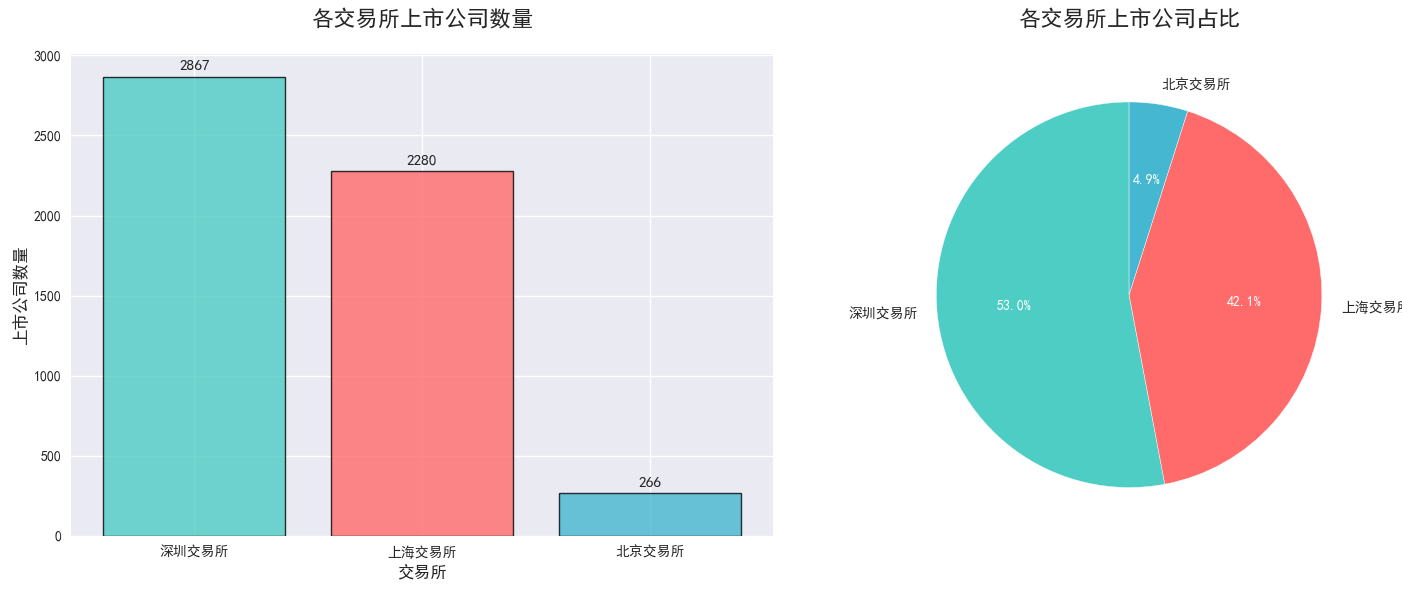

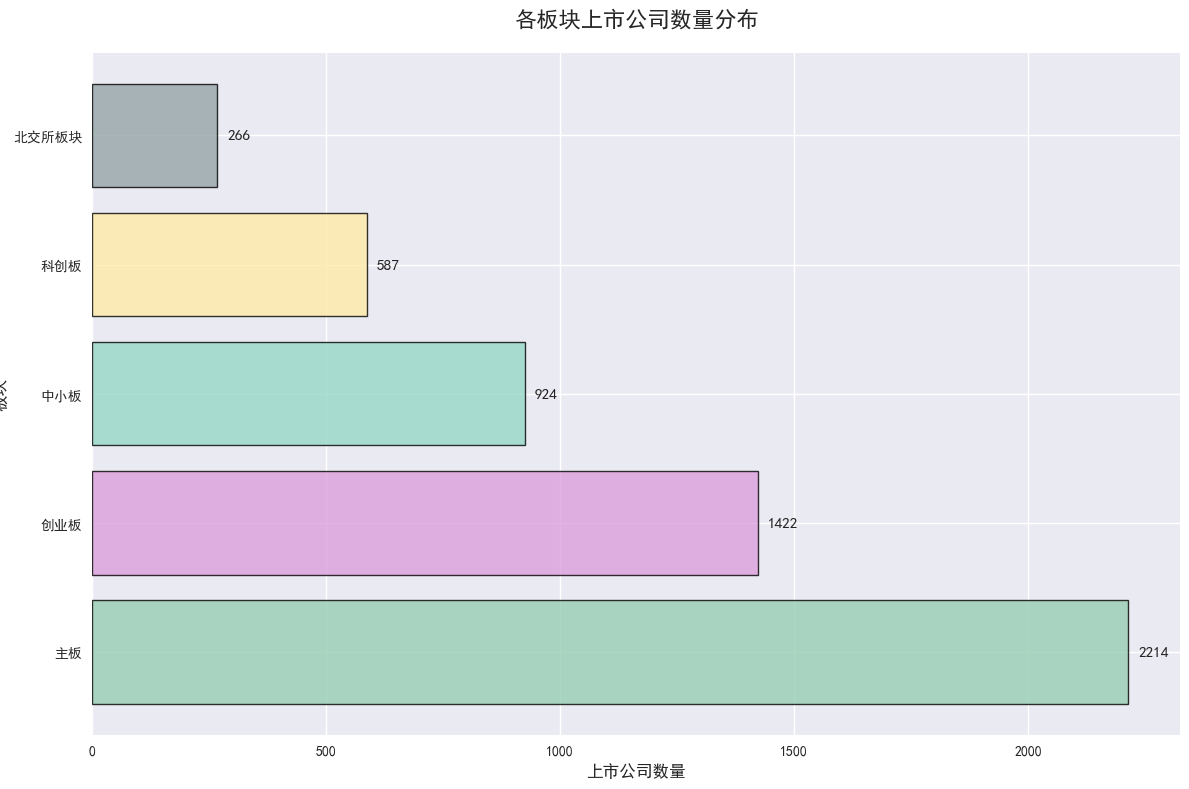

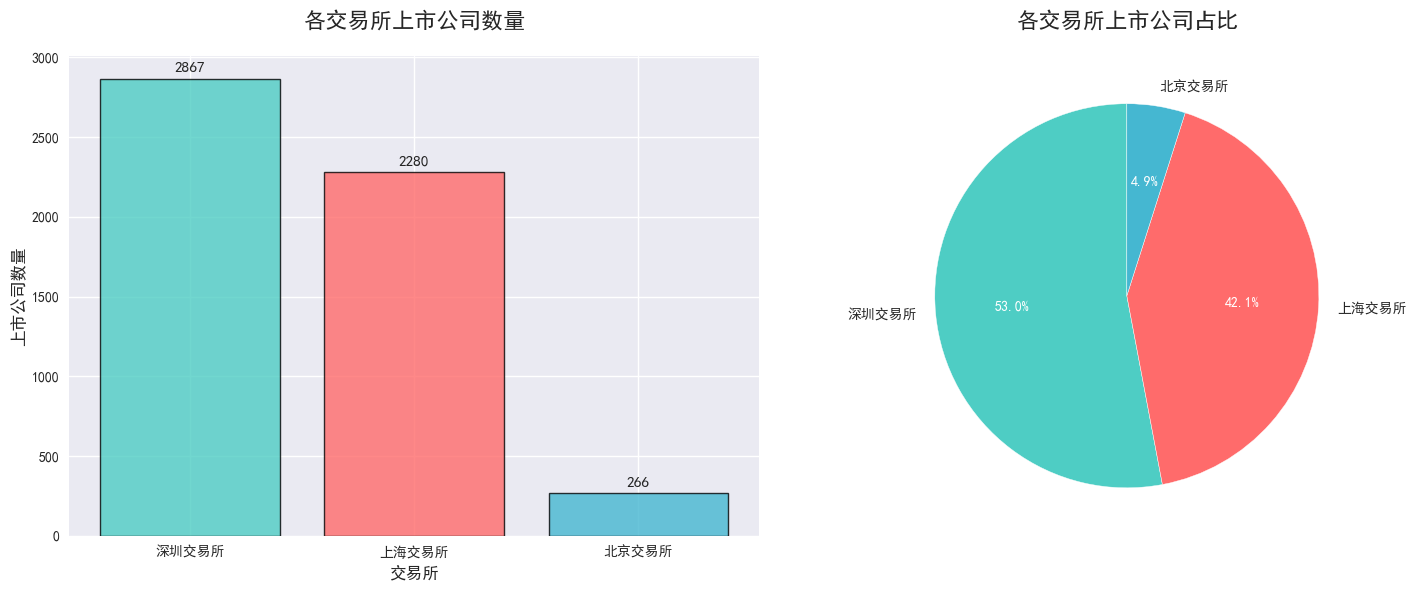


📊 2. 板块分布图：
板块分布图已保存到: ./results/charts\board_distribution_20250529_233750.png


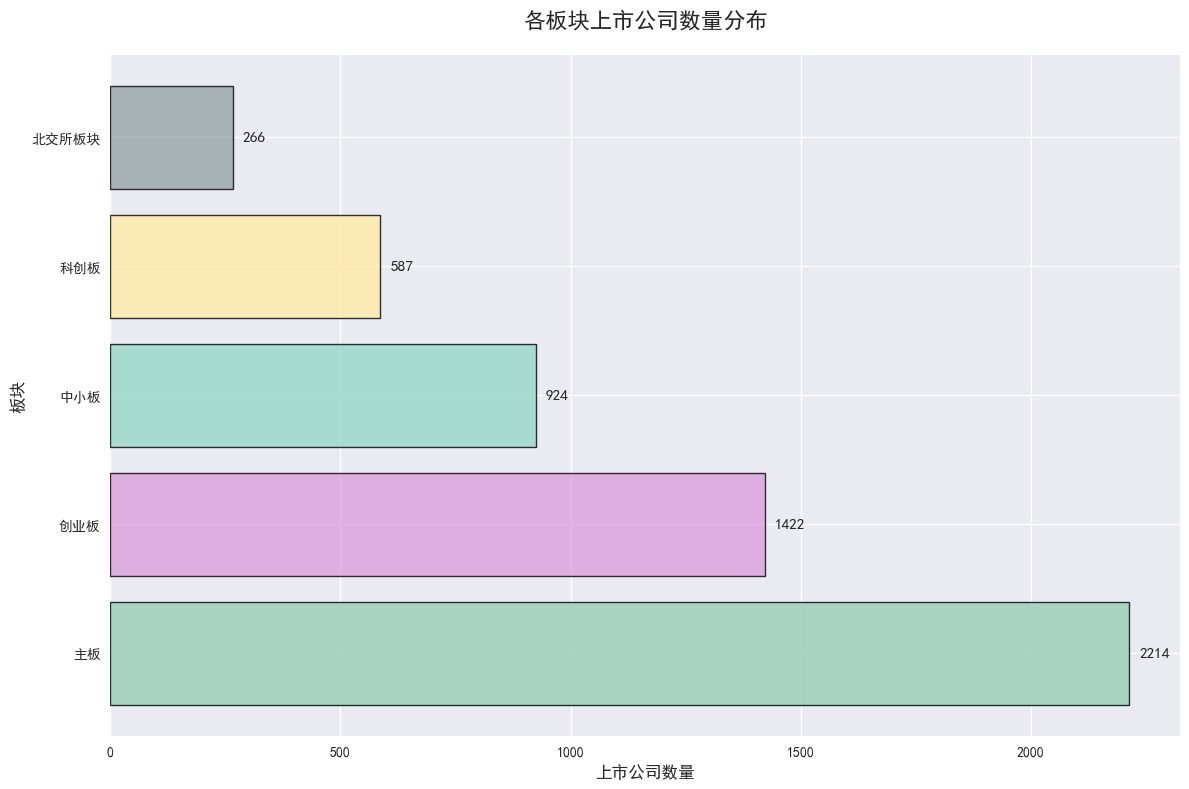


✅ 可视化图表已生成


交易所分布图已保存到: ./results/charts\exchange_distribution_20250529_233127.png

📊 2. 板块分布图：


板块分布图已保存到: ./results/charts\board_distribution_20250529_233127.png

✅ 可视化图表已生成


In [14]:
print("🎨 开始生成可视化图表...")
print("="*50)

try:
    # 创建可视化器
    visualizer = StockDataVisualizer(output_dir='./results/charts')
    
    # 绘制交易所分布图
    print("\n📊 1. 交易所分布图：")
    fig1 = visualizer.plot_exchange_distribution(exchange_stats)
    
    print("\n📊 2. 板块分布图：")
    fig2 = visualizer.plot_board_distribution(board_stats)
    
    print("\n✅ 可视化图表已生成")
    
except Exception as e:
    print(f"⚠️ 图表生成遇到问题: {e}")
    print("数据分析已完成，但可视化可能需要额外配置")

## 6. 保存分析结果

In [7]:
print("💾 保存分析结果...")
print("="*50)

# 创建结果目录
os.makedirs('./results/tables', exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
excel_filename = f"./results/tables/中国股票市场分析报告_真实数据_{timestamp}.xlsx"

try:
    with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
        # 保存交易所统计
        exchange_df = pd.DataFrame(list(exchange_stats.items()), columns=['交易所', '上市公司数量'])
        exchange_df['占比(%)'] = (exchange_df['上市公司数量'] / exchange_df['上市公司数量'].sum() * 100).round(1)
        exchange_df.to_excel(writer, sheet_name='交易所统计', index=False)
        
        # 保存板块统计
        board_df = pd.DataFrame(list(board_stats.items()), columns=['板块', '上市公司数量'])
        board_df['占比(%)'] = (board_df['上市公司数量'] / board_df['上市公司数量'].sum() * 100).round(1)
        board_df.to_excel(writer, sheet_name='板块统计', index=False)
        
        # 保存原始数据样例
        if not all_stocks.empty:
            sample_data = all_stocks.head(1000)
            sample_data.to_excel(writer, sheet_name='股票数据样例', index=False)
        
        # 添加说明页
        info_df = pd.DataFrame({
            '项目信息': ['项目名称', '数据类型', 'Python版本', '生成时间', '数据来源', '数据特点'],
            '详细说明': [
                '中国上市公司数量年度统计分析',
                '真实数据（akshare库）',
                f'{sys.version.split()[0]}',
                datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                'akshare - 中国金融数据接口',
                '实时获取的真实股票市场数据'
            ]
        })
        info_df.to_excel(writer, sheet_name='项目说明', index=False)
    
    print(f"📊 分析报告已保存到: {excel_filename}")
    
except Exception as e:
    print(f"❌ 保存Excel文件失败: {e}")

💾 保存分析结果...
📊 分析报告已保存到: ./results/tables/中国股票市场分析报告_真实数据_20250529_233254.xlsx


## 7. 分析结论

In [8]:
print("\n" + "=" * 60)
print("📋 分析结论 - 基于真实股票市场数据")
print("=" * 60)

total_companies = len(all_stocks)
print(f"🎯 总体规模: 中国股票市场共有 {total_companies:,} 家上市公司")

# 交易所分布分析
if exchange_stats:
    largest_exchange = max(exchange_stats.items(), key=lambda x: x[1])
    print(f"🏆 交易所分布: {largest_exchange[0]}是最大的交易所，拥有 {largest_exchange[1]:,} 家上市公司")

# 板块分布分析
if board_stats:
    largest_board = max(board_stats.items(), key=lambda x: x[1])
    print(f"📊 板块分布: {largest_board[0]}是最大的板块，拥有 {largest_board[1]:,} 家上市公司")

print("\n💡 数据说明:")
print("  • 使用akshare库获取的真实股票数据")
print("  • 数据来源：东方财富网等权威金融数据源")
print("  • 数据实时性：最新的市场数据")
print("  • 分析时间：", datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

print("\n📁 输出文件位置:")
print("  • 原始数据: ./data/raw/")
print("  • 处理数据: ./data/processed/")
print("  • 图表文件: ./results/charts/")
print("  • Excel报告: ./results/tables/")

print("\n🎉 真实数据分析完成！")


📋 分析结论 - 基于真实股票市场数据
🎯 总体规模: 中国股票市场共有 5,413 家上市公司
🏆 交易所分布: 深圳交易所是最大的交易所，拥有 2,867 家上市公司
📊 板块分布: 主板是最大的板块，拥有 2,214 家上市公司

💡 数据说明:
  • 使用akshare库获取的真实股票数据
  • 数据来源：东方财富网等权威金融数据源
  • 数据实时性：最新的市场数据
  • 分析时间： 2025-05-29 23:32:58

📁 输出文件位置:
  • 原始数据: ./data/raw/
  • 处理数据: ./data/processed/
  • 图表文件: ./results/charts/
  • Excel报告: ./results/tables/

🎉 真实数据分析完成！
